开始SHAP分析...
训练目标变量 1 的模型...
目标变量 1 模型评估:
  MSE: 4.8996
  R²: 0.9838
----------------------------------------
训练目标变量 2 的模型...
目标变量 2 模型评估:
  MSE: 0.0000
  R²: 0.7440
----------------------------------------
计算目标变量 1 的SHAP值...
计算目标变量 2 的SHAP值...
绘制SHAP摘要图...


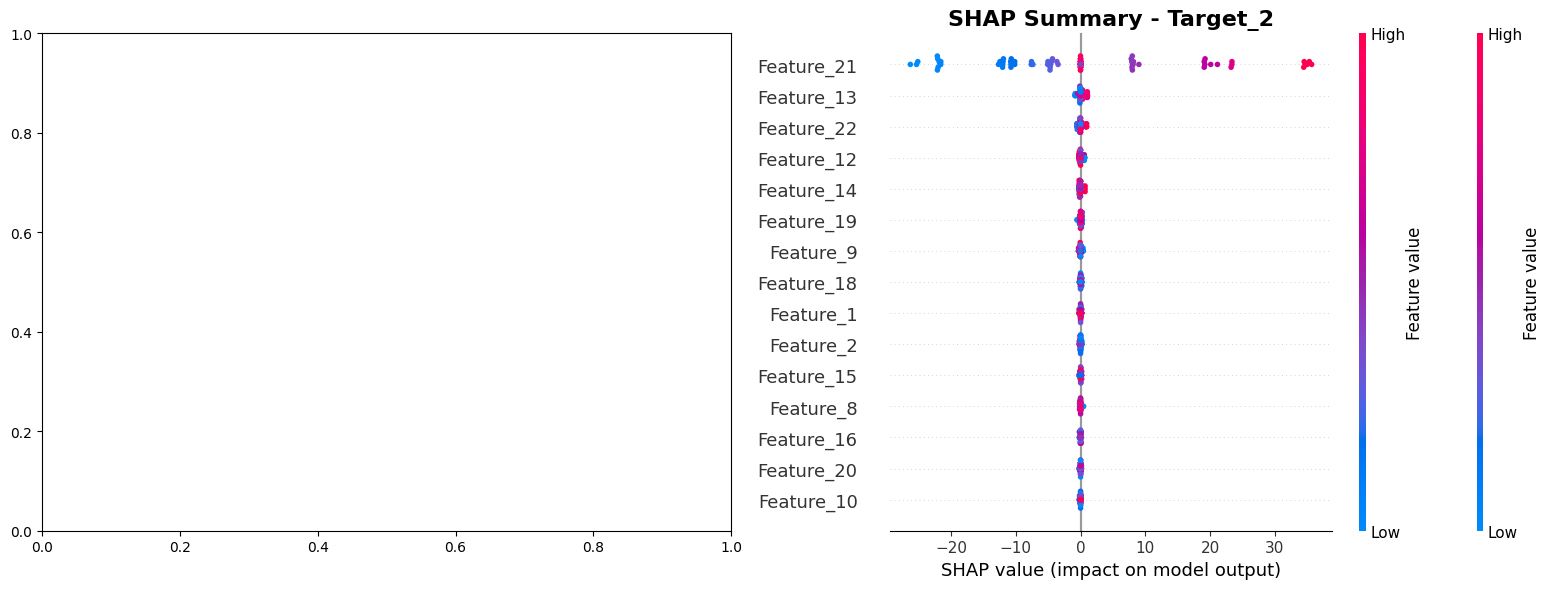

绘制特征重要性图...


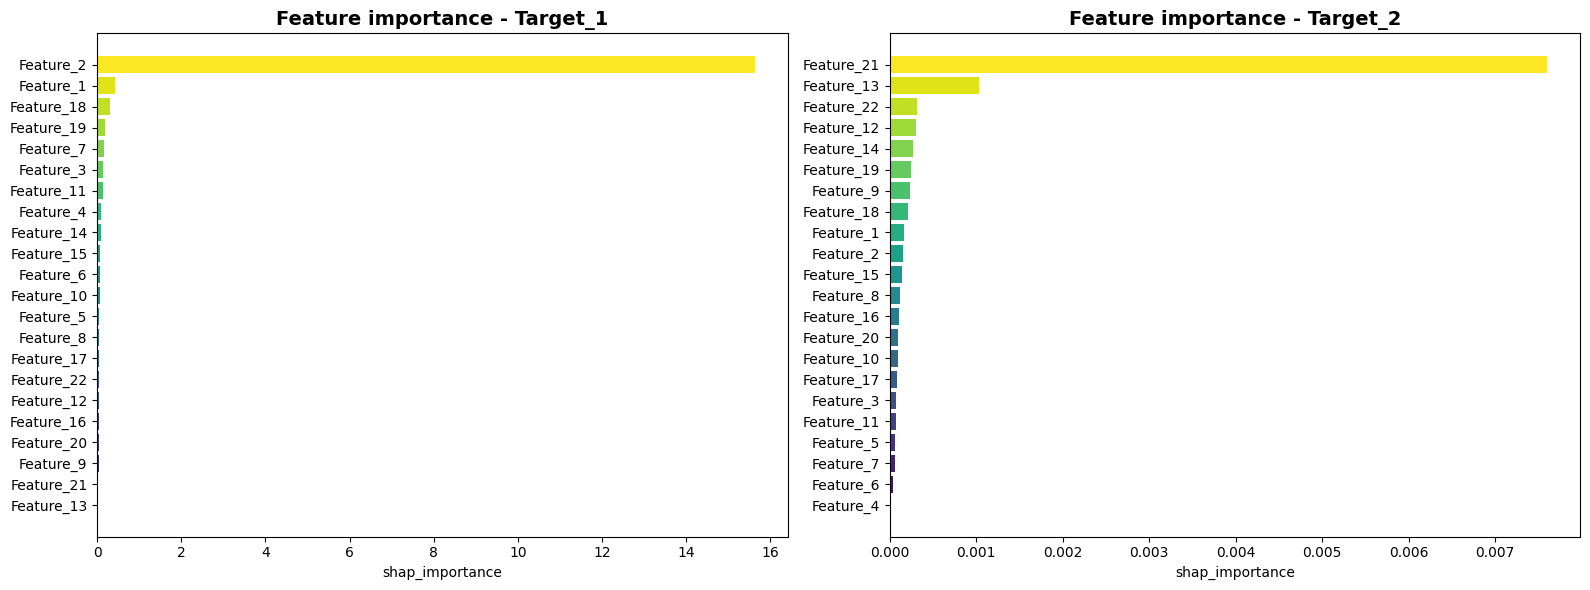

绘制特征依赖图...
创建分析汇总表...
SHAP分析完成！
SHAP分析汇总表（前10行）:
  target_var     feature  shap_importance  ranking
0   Target_1   Feature_1         0.418797        2
1   Target_1   Feature_2        15.624073        1
2   Target_1   Feature_3         0.147094       18
3   Target_1   Feature_4         0.097745       19
4   Target_1   Feature_5         0.054321        7
5   Target_1   Feature_6         0.076077        3
6   Target_1   Feature_7         0.159978       11
7   Target_1   Feature_8         0.050984        4
8   Target_1   Feature_9         0.034641       14
9   Target_1  Feature_10         0.075039       15

Target_1 的前5个最重要特征:
  Feature_2: 15.6241 (ranking: 1)
  Feature_1: 0.4188 (ranking: 2)
  Feature_18: 0.3102 (ranking: 16)
  Feature_19: 0.1813 (ranking: 20)
  Feature_7: 0.1600 (ranking: 11)

Target_2 的前5个最重要特征:
  Feature_21: 0.0076 (ranking: 6)
  Feature_13: 0.0010 (ranking: 16)
  Feature_22: 0.0003 (ranking: 4)
  Feature_12: 0.0003 (ranking: 8)
  Feature_14: 0.0003 (ranking: 20)


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体（可选）
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

class SHAPAnalyzer:
    def __init__(self, n_features=22, n_targets=2, random_state=42):
        """
        初始化SHAP分析器
        
        参数:
        n_features: 特征数量
        n_targets: 目标变量数量
        random_state: 随机种子
        """
        self.n_features = n_features
        self.n_targets = n_targets
        self.random_state = random_state
        self.models = []
        self.explainers = []
        self.shap_values = []
        
    def generate_sample_data(self, n_samples=59):
        """
        生成示例数据（在实际应用中，您应该使用自己的数据替换此部分）
        
        参数:
        n_samples: 样本数量
        
        返回:
        X: 特征数据 (n_samples, n_features)
        y: 目标数据 (n_samples, n_targets)
        feature_names: 特征名称列表
        target_names: 目标变量名称列表
        """
        np.random.seed(self.random_state)
        
        # 生成特征数据 (60, 22)
        X = np.load('/home/gnn/tianmengy/Y_ori.npy') #np.random.randn(n_samples, self.n_features)
        
        # 生成目标数据 - 添加一些非线性关系
        y = np.load('/home/gnn/tianmengy/X_ori.npy') #np.zeros((n_samples, self.n_targets))
        # print(X.shape,y.shape)
        # # 第一个目标变量：与某些特征有强相关性
        # y[:, 0] = (2 * X[:, 0] + 1.5 * X[:, 1] - 0.8 * X[:, 2] + 
        #            0.5 * X[:, 0] * X[:, 1] + np.random.randn(n_samples) * 0.5)
        
        # # 第二个目标变量：与另一些特征有强相关性
        # y[:, 1] = (-1.2 * X[:, 3] + 1.8 * X[:, 4] + 0.7 * X[:, 5] + 
        #            0.3 * X[:, 3] * X[:, 4] + np.random.randn(n_samples) * 0.5)
        
        # 生成特征名称和目标名称
        # feature_names = [f'Feature_{i+1}' for i in range(self.n_features)]
        feature_names=['',]
        target_names = [f'Target_{i+1}' for i in range(self.n_targets)]
        
        return X, y, feature_names, target_names
    
    def train_models(self, X, y):
        """
        为每个目标变量训练随机森林模型
        
        参数:
        X: 特征数据
        y: 目标数据
        """
        self.models = []
        
        for i in range(self.n_targets):
            print(f"训练目标变量 {i+1} 的模型...")
            
            # 分割数据
            X_train, X_test, y_train, y_test = train_test_split(
                X, y[:, i], test_size=0.2, random_state=self.random_state
            )
            
            # 训练随机森林模型
            model = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                random_state=self.random_state
            )
            model.fit(X_train, y_train)
            
            # 评估模型
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            print(f"目标变量 {i+1} 模型评估:")
            print(f"  MSE: {mse:.4f}")
            print(f"  R²: {r2:.4f}")
            print("-" * 40)
            
            self.models.append(model)
    
    def compute_shap_values(self, X):
        """
        计算每个模型的SHAP值
        
        参数:
        X: 特征数据
        """
        self.explainers = []
        self.shap_values = []
        
        for i, model in enumerate(self.models):
            print(f"计算目标变量 {i+1} 的SHAP值...")
            
            # 创建SHAP解释器
            explainer = shap.TreeExplainer(model)
            
            # 计算SHAP值
            shap_values = explainer.shap_values(X)
            
            self.explainers.append(explainer)
            self.shap_values.append(shap_values)
    
    def plot_summary(self, X, feature_names, target_names):
        """
        绘制SHAP摘要图
        
        参数:
        X: 特征数据
        feature_names: 特征名称列表
        target_names: 目标变量名称列表
        """
        fig, axes = plt.subplots(1, self.n_targets, figsize=(8 * self.n_targets, 6))
        
        if self.n_targets == 1:
            axes = [axes]
        
        for i in range(self.n_targets):
            shap.summary_plot(
                self.shap_values[i], 
                X, 
                feature_names=feature_names,
                show=False,
                plot_size=None,
                max_display=15
            )
            plt.title(f"SHAP Summary - {target_names[i]}", fontsize=16, fontweight='bold')
            
            # 保存单独的摘要图
            plt.figure(figsize=(10, 8))
            shap.summary_plot(
                self.shap_values[i], 
                X, 
                feature_names=feature_names,
                show=False,
                plot_size=None,
                max_display=15
            )
            plt.title(f"SHAP Summary - {target_names[i]}", fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.savefig(f'shap_summary_target_{i+1}.png', dpi=300, bbox_inches='tight')
            plt.close()
        
        plt.tight_layout()
        plt.savefig('shap_summary_all.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_feature_importance(self, feature_names, target_names):
        """
        绘制特征重要性图
        
        参数:
        feature_names: 特征名称列表
        target_names: 目标变量名称列表
        """
        fig, axes = plt.subplots(1, self.n_targets, figsize=(8 * self.n_targets, 6))
        
        if self.n_targets == 1:
            axes = [axes]
        
        for i in range(self.n_targets):
            # 计算平均绝对SHAP值作为特征重要性
            shap_importance = np.abs(self.shap_values[i]).mean(axis=0)
            
            # 创建DataFrame便于绘图
            importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': shap_importance
            }).sort_values('importance', ascending=True)
            
            # 绘制水平条形图
            axes[i].barh(
                importance_df['feature'], 
                importance_df['importance'],
                color=plt.cm.viridis(np.linspace(0, 1, len(feature_names)))
            )
            axes[i].set_title(f'Feature importance - {target_names[i]}', fontsize=14, fontweight='bold')
            axes[i].set_xlabel('shap_importance')
            
            # 保存单独的特征重要性图
            plt.figure(figsize=(10, 8))
            plt.barh(
                importance_df['feature'], 
                importance_df['importance'],
                color=plt.cm.viridis(np.linspace(0, 1, len(feature_names)))
            )
            plt.title(f'Feature importance - {target_names[i]}', fontsize=16, fontweight='bold')
            plt.xlabel('shap_importance')
            plt.tight_layout()
            plt.savefig(f'feature_importance_target_{i+1}.png', dpi=300, bbox_inches='tight')
            plt.close()
        
        plt.tight_layout()
        plt.savefig('feature_importance_all.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_dependence(self, X, feature_names, target_names, top_features=5):
        """
        绘制最重要的特征的依赖图
        
        参数:
        X: 特征数据
        feature_names: 特征名称列表
        target_names: 目标变量名称列表
        top_features: 每个目标变量显示的前几个特征
        """
        for i in range(self.n_targets):
            # 计算特征重要性
            shap_importance = np.abs(self.shap_values[i]).mean(axis=0)
            top_indices = np.argsort(shap_importance)[-top_features:][::-1]
            
            # 为每个重要特征创建依赖图
            for j, idx in enumerate(top_indices):
                plt.figure(figsize=(10, 6))
                shap.dependence_plot(
                    idx, 
                    self.shap_values[i], 
                    X, 
                    feature_names=feature_names,
                    show=False
                )
                plt.title(f'{target_names[i]} - {feature_names[idx]} dependence', 
                         fontsize=16, fontweight='bold')
                plt.tight_layout()
                plt.savefig(f'dependence_target_{i+1}_feature_{feature_names[idx]}.png', 
                           dpi=300, bbox_inches='tight')
                plt.close()
    
    def create_summary_table(self, feature_names, target_names):
        """
        创建SHAP分析结果汇总表
        
        参数:
        feature_names: 特征名称列表
        target_names: 目标变量名称列表
        
        返回:
        summary_df: 汇总DataFrame
        """
        summary_data = []
        
        for i in range(self.n_targets):
            # 计算每个特征的平均绝对SHAP值
            shap_importance = np.abs(self.shap_values[i]).mean(axis=0)
            
            for j, feature in enumerate(feature_names):
                summary_data.append({
                    'target_var': target_names[i],
                    'feature': feature,
                    'shap_importance': shap_importance[j],
                    'ranking': np.argsort(shap_importance)[::-1][j] + 1
                })
        
        summary_df = pd.DataFrame(summary_data)
        
        # 保存到Excel
        summary_df.to_excel('shap_analysis_summary.xlsx', index=False)
        
        return summary_df
    
    def run_complete_analysis(self, X, y, feature_names, target_names):
        """
        运行完整的SHAP分析流程
        
        参数:
        X: 特征数据
        y: 目标数据
        feature_names: 特征名称列表
        target_names: 目标变量名称列表
        """
        print("开始SHAP分析...")
        print("=" * 50)
        
        # 1. 训练模型
        self.train_models(X, y)
        
        # 2. 计算SHAP值
        self.compute_shap_values(X)
        
        # 3. 绘制摘要图
        print("绘制SHAP摘要图...")
        self.plot_summary(X, feature_names, target_names)
        
        # 4. 绘制特征重要性图
        print("绘制特征重要性图...")
        self.plot_feature_importance(feature_names, target_names)
        
        # 5. 绘制依赖图
        print("绘制特征依赖图...")
        self.plot_dependence(X, feature_names, target_names)
        
        # 6. 创建汇总表
        print("创建分析汇总表...")
        summary_df = self.create_summary_table(feature_names, target_names)
        
        print("SHAP分析完成！")
        print("=" * 50)
        
        return summary_df

# 使用示例
if __name__ == "__main__":
    # 创建SHAP分析器
    analyzer = SHAPAnalyzer(n_features=22, n_targets=2)
    
    # 生成示例数据（在实际应用中，您应该使用自己的数据替换这部分）
    X, y, feature_names, target_names = analyzer.generate_sample_data(n_samples=60)
    
    # 运行完整分析
    summary_df = analyzer.run_complete_analysis(X, y, feature_names, target_names)
    
    # 显示汇总表的前几行
    print("SHAP分析汇总表（前10行）:")
    print(summary_df.head(10))
    
    # 显示每个目标变量的前5个最重要特征
    for target in target_names:
        target_data = summary_df[summary_df['target_var'] == target]
        top_features = target_data.nlargest(5, 'shap_importance')
        print(f"\n{target} 的前5个最重要特征:")
        for _, row in top_features.iterrows():
            print(f"  {row['feature']}: {row['shap_importance']:.4f} (ranking: {row['ranking']})")